# 多次元尺度法

$n$個体間の非類似度あるいは距離が与えられているとき、それら$n$個体間の位置関係を(低次元)座標で表現する手法として、**多次元尺度法**(**多次元尺度構成法**)が知られている。  
多次元尺度法には、大きく分けて計量MDSと非計量MDSがあるが前者について記載する。  
$n$個体間の非類似度あるいは距離データ$d_{ij} \geq 0, i \neq j(i,j=1,...,n)$(ただし$d_{ij}=d_{ji}$)が与えられているとする。  
類似度データが与えられている場合は、ある値から引き算を行う、または逆数をとるなど、非類似度データに変換してから分析する。  
また、三角不等式$d_{ij}+d_{il} \geq d_{jl}$が満たされないような$i,j,l$の組み合わせが存在するなど、明らかに座標上の距離として表すことができない場合は、少なくとも三角不等式が成立するように変換してから分析することが多い。

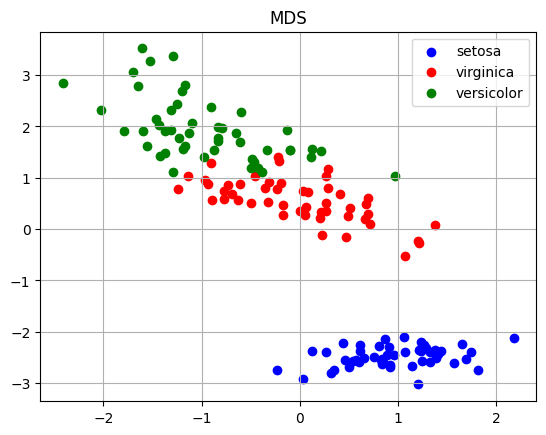

In [2]:
# irisデータで実践
import pandas as pd

from sklearn.datasets import load_iris
from sklearn.manifold import MDS
import matplotlib.pyplot as plt

iris = load_iris()
iris_df = pd.DataFrame(
        iris.data,
        columns=iris.feature_names,
    )

clf = MDS(n_components=2, dissimilarity="euclidean", random_state=0, normalized_stress="auto") # 2次元に落とし込む
X_mds = clf.fit_transform(iris_df)

# グラフで可視化
plt.scatter(X_mds[0:49, 0], X_mds[0:49, 1], c="b", label="setosa") 
plt.scatter(X_mds[50:99, 0], X_mds[50:99, 1], c="r", label="virginica") 
plt.scatter(X_mds[100:149, 0], X_mds[100:149, 1], c="g", label="versicolor")
plt.legend()
plt.title("MDS")
plt.grid()
plt.show()

setosa, virginica, versicolorである程度分離できていることがわかる。

# 正準相関分析

2つの変数群$x_1,...,x_p$および$y_1,...,y_q$があるとする。  
このとき、$x_1,...,x_p$の線形結合$a_1 x_1+...+a_p x_p$と$y_1,...,y_q$の線形結合$b_1 y_1+...+b_q y_q$が最も高い相関を持つように係数$a_1,...,a_p$と$b_1,...,b_q$を定め、得られた係数の値や相関係数(正準相関係数)の大きさなどから両変数群の関係を解釈していく手法を**正準相関分析**と呼ぶ。  
得られた線形結合の変数$a_1 x_1+...+a_p x_p$および$b_1 y_1+...+b_q y_q$を**正準変数**と呼ぶ。  
主成分分析は変数群が1つの場合であり、正準相関分析は変数群が2つある場合に拡張したものと考えることができる。  
また、別の見方として、2つの変数群のうちの片方が変数1つだけであるときが重回帰分析に相当しており、重回帰分析の一般化と考えることもできる。

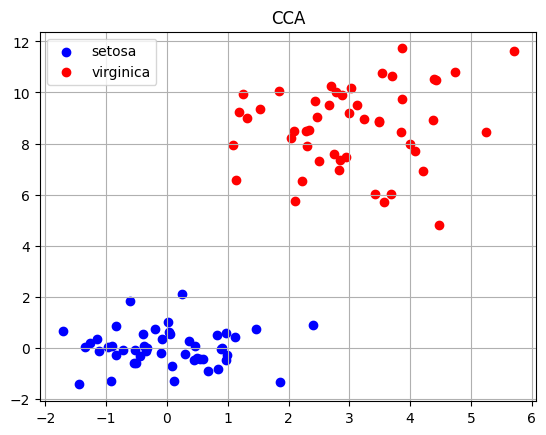

In [3]:
# irisデータで実践
from sklearn.cross_decomposition import CCA

X1 = iris_df[0:49] # setosa
X2 = iris_df[50:99] # virginica

cca = CCA(n_components=2)
cca.fit(X1, X2)

Y1 = cca.transform(X1)
Y2 = cca.transform(X2)

# データ可視化
plt.scatter(Y1[:,0], Y1[:,1], c="b", label="setosa") 
plt.scatter(Y2[:,0], Y2[:,1], c="r", label="virginica") 
plt.legend()
plt.title("CCA")
plt.grid()
plt.show()

setosa, virginicaで分離できていることがわかる。(=共通成分がない)

# 数量化法、対応分析

質的データ、カテゴリー化されたデータを扱う多変量解析手法として、数量化法や対応分析が知られている。  
各分析の特徴をまとめると以下の通り  
- 数量化Ⅰ類：説明変数がすべて質的データの場合の重回帰分析
- 数量化Ⅱ類：説明変数がすべて質的データの場合の判別分析
- 数量化Ⅲ類：説明変数がすべて質的データの場合の主成分分析
- 対応分析：分割表であらわされるデータの分析手法